In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# KMeans 군집화
from sklearn.cluster import KMeans
# 위도, 경도 계산
# haversine 설치해줘야 함 !
#!pip install haversine
from haversine import haversine

# 순열
from itertools import permutations

# 진행과정
from tqdm import tqdm_notebook

In [4]:
place = pd.read_csv('data/rental.csv', encoding='cp949', index_col='대여소번호')

In [5]:
place

,보관소(대여소)명,자치구,상세주소,위도,경도,설치시기,LCD,QR,운영\n방식
대여소번호,,,,,,,,,
301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07,16.0,NaN,LCD
302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130,37.575947,126.974060,2015-10-07,12.0,NaN,LCD
303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189,37.571770,126.974663,2015-10-07,8.0,NaN,LCD
304,광화문역 2번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.572113,126.977577,2021-01-26,NaN,7.0,QR
305,종로구청 옆,종로구,서울특별시 종로구 삼봉로 43,37.572582,126.978355,2015-10-07,16.0,NaN,LCD
...,...,...,...,...,...,...,...,...,...
1085,래미안 솔베뉴(고덕로),강동구,양재대로1650,37.554569,127.145874,2020-01-13,NaN,20.0,QR
1086,래미안 솔베뉴(구천면로),강동구,양재대로1650,37.550598,127.145454,2020-01-10,NaN,10.0,QR
1088,풍납사거리(강동),강동구,성내동451-3,37.528122,127.119522,2020-01-14,NaN,12.0,QR


In [6]:
# '위도'와 '경도' 컬럼에 결측치가 있으므로 삭제해줌 !
place.dropna(subset=['위도'], inplace=True)
place

,보관소(대여소)명,자치구,상세주소,위도,경도,설치시기,LCD,QR,운영\n방식
대여소번호,,,,,,,,,
301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07,16.0,NaN,LCD
302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130,37.575947,126.974060,2015-10-07,12.0,NaN,LCD
303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189,37.571770,126.974663,2015-10-07,8.0,NaN,LCD
304,광화문역 2번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.572113,126.977577,2021-01-26,NaN,7.0,QR
305,종로구청 옆,종로구,서울특별시 종로구 삼봉로 43,37.572582,126.978355,2015-10-07,16.0,NaN,LCD
...,...,...,...,...,...,...,...,...,...
1085,래미안 솔베뉴(고덕로),강동구,양재대로1650,37.554569,127.145874,2020-01-13,NaN,20.0,QR
1086,래미안 솔베뉴(구천면로),강동구,양재대로1650,37.550598,127.145454,2020-01-10,NaN,10.0,QR
1088,풍납사거리(강동),강동구,성내동451-3,37.528122,127.119522,2020-01-14,NaN,12.0,QR


In [7]:
placeDF = place[['위도','경도']]
placeDF.head()

,위도,경도
대여소번호,,
301,37.575794,126.971451
302,37.575947,126.974060
303,37.571770,126.974663
304,37.572113,126.977577
305,37.572582,126.978355


In [8]:
# 결측치 제거 완료 
placeDF.isnull().sum()

위도    0
경도    0
dtype: int64

In [9]:
# n_cluster 갯수를 변수에 담아줌
cluster_value = 100

model = KMeans(n_clusters = cluster_value, 
               random_state = 41)
# n_clusters = 3 : 군집의 개수 (k) (이미 알고 있음)
# random_state = 0 : seed 역할 (모델을 일정하게 생성 = 랜덤X)

model.fit(placeDF)

KMeans(n_clusters=100, random_state=41)

In [10]:
pre = model.predict(placeDF)
pre
len(pre) # 2042 (관측치 개수만큼 예측치 생성됨)

2042

In [11]:
pre

array([55, 55, 55, ...,  4, 53, 15])

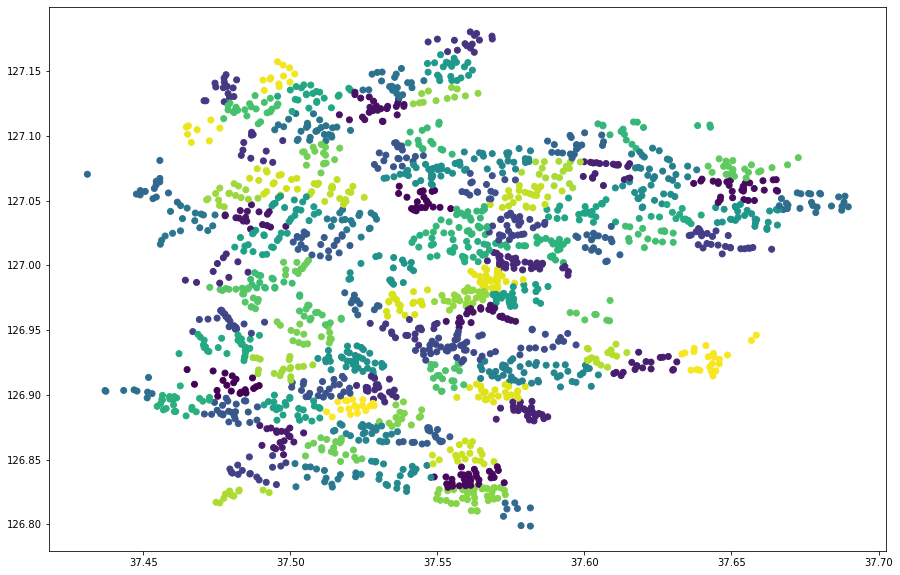

In [12]:
# 군집화 시각화
plt.figure(figsize=(15,10))
plt.scatter(x = placeDF['위도'], 
            y = placeDF['경도'], 
            c = pre)

In [13]:
# 군집별 중앙값
centers = model.cluster_centers_
centers

array([[ 37.48001005, 126.90809295],
       [ 37.54475305, 127.0500289 ],
       [ 37.56108958, 126.83565268],
       [ 37.65238537, 127.05947603],
       [ 37.52931624, 127.12146216],
       [ 37.56551478, 126.96115878],
       [ 37.48688739, 127.03657656],
       [ 37.49658516, 126.86706584],
       [ 37.62066563, 126.92268774],
       [ 37.6077171 , 127.0738754 ],
       [ 37.58015478, 126.88708561],
       [ 37.57815162, 127.00121115],
       [ 37.4759588 , 126.9960921 ],
       [ 37.52976495, 126.90449924],
       [ 37.48844836, 127.09094864],
       [ 37.55978688, 127.17242475],
       [ 37.54022156, 126.94960872],
       [ 37.47723973, 127.13604087],
       [ 37.64553081, 127.01873919],
       [ 37.48790953, 126.84128347],
       [ 37.57624456, 127.02967922],
       [ 37.47865759, 126.95684227],
       [ 37.5554819 , 126.93639574],
       [ 37.58681207, 126.94082864],
       [ 37.56558125, 127.05993238],
       [ 37.51128229, 126.90473121],
       [ 37.53626463, 127.08471732],
 

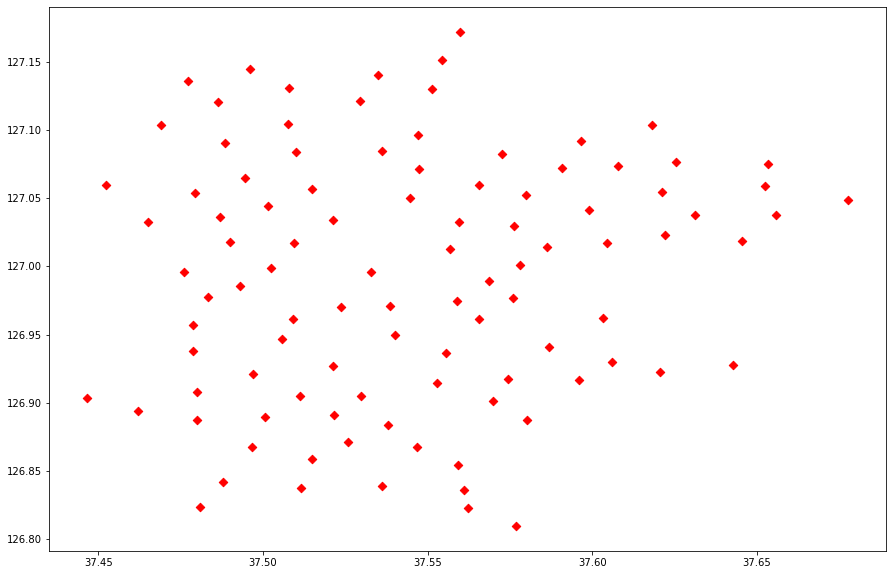

In [14]:
# 군집별 중앙값 시각화
plt.figure(figsize = (15,10))

plt.scatter(x = centers[:,0], 
            y = centers[:,1], 
            marker = 'D',     # 마커 모양은 Diamond
            c = 'r')          # 색깔은 red
plt.show()

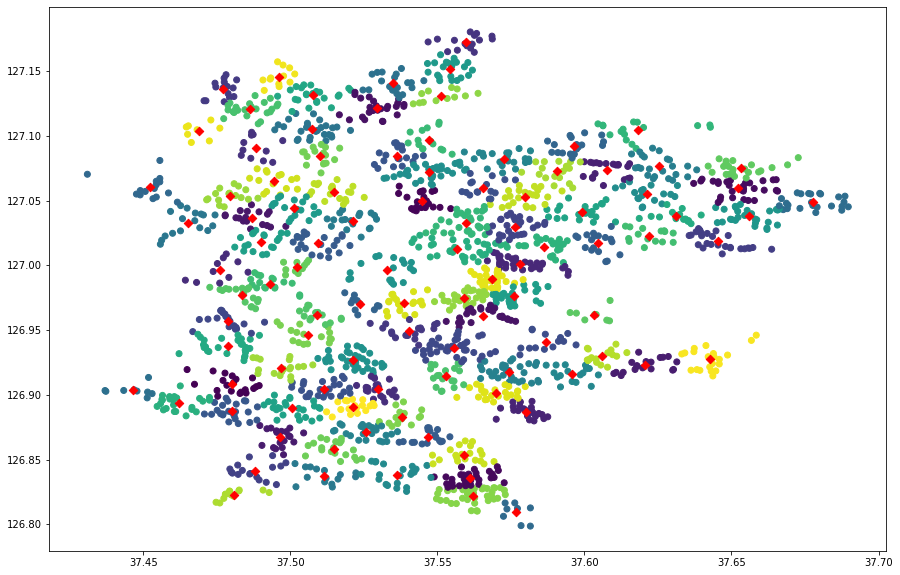

In [15]:
# 군집결과와 중앙값 함께 시각화
plt.figure(figsize=(15,10))

plt.scatter(x = placeDF['위도'], 
            y = placeDF['경도'], 
            c = pre) 

plt.scatter(x = centers[:,0], 
            y = centers[:,1], 
            marker = 'D', 
            c = 'r')
plt.show() 

In [16]:
Total_Data = placeDF
Total_Data['group'] = pre

In [17]:
Total_Data

,위도,경도,group
대여소번호,,,
301,37.575794,126.971451,55
302,37.575947,126.974060,55
303,37.571770,126.974663,55
304,37.572113,126.977577,55
305,37.572582,126.978355,55
...,...,...,...
1085,37.554569,127.145874,53
1086,37.550598,127.145454,53
1088,37.528122,127.119522,4


In [18]:
Total_Data[Total_Data['group']==1].index[0]

3515

In [19]:
Total_Data[Total_Data['group']==0]

,위도,경도,group
대여소번호,,,
1911,37.484940,126.901321,0
1955,37.482883,126.901039,0
1828,37.475319,126.898888,0
1836,37.467403,126.908142,0
1843,37.477097,126.911133,0
1856,37.478409,126.907372,0
1870,37.475071,126.903359,0
282,37.487530,126.904877,0
2012,37.488361,126.906227,0


In [20]:
# 군집화별 대여소 번호가 몇개 들어있는지 한번에 보기위해 for문 돌림 !
for i in range(1, 100):
    print("-----", (i), "번째 군집화 갯수 -----")
    print(len(Total_Data[Total_Data['group']==i]))


----- 1 번째 군집화 갯수 -----
21
----- 2 번째 군집화 갯수 -----
31
----- 3 번째 군집화 갯수 -----
30
----- 4 번째 군집화 갯수 -----
25
----- 5 번째 군집화 갯수 -----
23
----- 6 번째 군집화 갯수 -----
18
----- 7 번째 군집화 갯수 -----
19
----- 8 번째 군집화 갯수 -----
19
----- 9 번째 군집화 갯수 -----
20
----- 10 번째 군집화 갯수 -----
23
----- 11 번째 군집화 갯수 -----
34
----- 12 번째 군집화 갯수 -----
10
----- 13 번째 군집화 갯수 -----
21
----- 14 번째 군집화 갯수 -----
11
----- 15 번째 군집화 갯수 -----
16
----- 16 번째 군집화 갯수 -----
18
----- 17 번째 군집화 갯수 -----
15
----- 18 번째 군집화 갯수 -----
27
----- 19 번째 군집화 갯수 -----
17
----- 20 번째 군집화 갯수 -----
27
----- 21 번째 군집화 갯수 -----
22
----- 22 번째 군집화 갯수 -----
39
----- 23 번째 군집화 갯수 -----
14
----- 24 번째 군집화 갯수 -----
16
----- 25 번째 군집화 갯수 -----
24
----- 26 번째 군집화 갯수 -----
19
----- 27 번째 군집화 갯수 -----
24
----- 28 번째 군집화 갯수 -----
22
----- 29 번째 군집화 갯수 -----
17
----- 30 번째 군집화 갯수 -----
18
----- 31 번째 군집화 갯수 -----
11
----- 32 번째 군집화 갯수 -----
20
----- 33 번째 군집화 갯수 -----
15
----- 34 번째 군집화 갯수 -----
8
----- 35 번째 군집화 갯수 -----
24
----- 36 번째 군집화 갯수 -----
9
---

In [21]:
Total_Data[Total_Data['group']==5].iloc[0,:2]

위도     37.572029
경도    126.960785
Name: 348, dtype: float64

In [22]:
# 실패작 1
# distance = []
# dis_min = []
# dis_per = []
# for i in range(0,25):
#     #각 군집화의 최소거리를 구하기 위한 서브 리스트 생성
#     sub_distance = []
#     for j in range(0,len(Total_Data[Total_Data['group']==i])):
#         for k in range(j+1,len(Total_Data[Total_Data['group']==i])):
#             data1 = Total_Data[Total_Data['group']==i].iloc[j,:2]
#             data2 = Total_Data[Total_Data['group']==i].iloc[k,:2]
#             result = haversine(data1, data2, unit = 'm')
#             distance.append(result)
#             #서브리스트에 값을 추가하고 후에 최소값 구별시키게 만들기
#             sub_distance.append(result)
#     # 각 군집화의 최소거리 추가하기
#     dis_min.append(min(sub_distance))
#     # 절취선
#     distance.append(1111111111111111)

In [23]:
# 실패작 2
# distance = []
# dis_min = []
# dis_per = []
# for i in range(0,25):
#     #각 군집화의 최소거리를 구하기 위한 서브 리스트 생성
#     sub_distacne = []
#     for j in range(0,len(Total_Data[Total_Data['group']==i])):
#         for k in range(j+1,len(Total_Data[Total_Data['group']==i])):
#             data1 = Total_Data[Total_Data['group']==i].iloc[j,:2]
#             data2 = Total_Data[Total_Data['group']==i].iloc[k,:2]
#             result = haversine(data1, data2, unit = 'm')
#             distance.append(result)
#             #서브리스트에 값을 추가하고 후에 최소값 구별시키게 만들기
#             sub_distacne.append(result)
#             # 순열을 이용해서 최소값 찾기(?)
#         dis_per.append(list(permutations(sub_distacne,len(Total_Data[Total_Data['group']==i]))))
#         dis_per.append(11111111111111111)
#     # 절취선
#     distance.append(1111111111111111)


In [24]:
distance = []
dis_mean = []
dis_min = []
dis_num = []
latitude = []  # 위도
longitude =[]  # 경도

for i in tqdm_notebook(range(0,cluster_value)):
    #각 군집화의 최소거리를 구하기 위한 서브 리스트 생성
    sub_distance = []
    sub_mean = []
    #각 군집화의 한 점을 기준으로 반복문
    for j in range(0,len(Total_Data[Total_Data['group']==i])):
        #한 점을 기준으로 나머지 모든 점을 평균값내기
        for k in range(0,len(Total_Data[Total_Data['group']==i])):
            data1 = Total_Data[Total_Data['group']==i].iloc[j,:2]
            data2 = Total_Data[Total_Data['group']==i].iloc[k,:2]
            result = haversine(data1, data2, unit = 'm')
            distance.append(result)
            #서브리스트에 값을 추가하고 후에 최소값 구별시키게 만들기
            sub_distance.append(int(result))
        dis_num.append(Total_Data[Total_Data['group']==i].index[j])
        latitude.append(Total_Data[Total_Data['group']==i].iloc[j, 0])
        longitude.append(Total_Data[Total_Data['group']==i].iloc[j, 1])
        dis_mean.append(sum(sub_distance, 0.0)/(len(sub_distance)-1))
        sub_mean.append(sum(sub_distance, 0.0)/(len(sub_distance)-1))
        #군집합의 한 점 기준으로 값을 표현
#         distance.append('-------------------')
    #각 군집화의 최소거리 추가하기
    dis_min.append(min(sub_mean))
    # 절취선
#     dis_mean.append('------------------------------')
#     distance.append('------------------------------')
#     dis_num.append('-----------------------------')
data = pd.DataFrame({"대여소번호" : dis_num, "위도" : latitude, "경도" : longitude, "평균거리" : dis_mean})

In [25]:
empty = {"대여소번호" : dis_num, "위도" : latitude, "경도" : longitude, "평균거리" : dis_mean}
resultDF = pd.DataFrame(empty)

for i in dis_min:
    resultDF = pd.concat([resultDF,data[data['평균거리']==i]])
resultDF

,대여소번호,위도,경도,평균거리
0,1911,37.484940,126.901321,1042.421053
1,1955,37.482883,126.901039,989.256410
2,1828,37.475319,126.898888,1063.050847
3,1836,37.467403,126.908142,1187.367089
4,1843,37.477097,126.911133,1127.808081
...,...,...,...,...
1959,335,37.570198,126.991257,676.507177
1984,2344,37.465061,127.101196,756.733333
1991,1204,37.493343,127.144730,709.454545
2004,903,37.645866,126.927391,1023.243902


In [26]:
resultDF.describe()

,대여소번호,위도,경도,평균거리
count,2142.000000,2142.000000,2142.000000,2142.000000
mean,1500.860411,37.547920,126.989880,995.003190
std,928.587272,0.051869,0.089032,155.473464
min,101.000000,37.430977,126.798599,482.968750
25%,716.750000,37.505524,126.917050,896.382859
50%,1384.500000,37.547825,127.001389,988.436805
75%,2218.500000,37.577966,127.058075,1094.967295
max,4202.000000,37.689720,127.180267,1642.516129


In [27]:
Total_Data[Total_Data['group']==0].head()

,위도,경도,group
대여소번호,,,
1911,37.484940,126.901321,0
1955,37.482883,126.901039,0
1828,37.475319,126.898888,0
1836,37.467403,126.908142,0
1843,37.477097,126.911133,0


In [28]:
Total_Data[Total_Data['group']==0].iloc[1,0:2]

위도     37.482883
경도    126.901039
Name: 1955, dtype: float64

In [29]:
Total_Data[Total_Data['group']==0].iloc[0, 0:1]

위도    37.48494
Name: 1911, dtype: float64

In [30]:
Total_Data[Total_Data['group']==0].iloc[0, 1]

126.901321

In [31]:
distance = []
dis_mean = []
dis_num = []
latitude = []  # 위도
longitude =[]  # 경도

for j in range(0,len(Total_Data[Total_Data['group']==0])):
    #한 점을 기준으로 나머지 모든 점을 평균값내기
    for k in range(0,len(Total_Data[Total_Data['group']==0])):
        data1 = Total_Data[Total_Data['group']==0].iloc[j,0:2]
        data2 = Total_Data[Total_Data['group']==0].iloc[k,0:2]
        result = haversine(data1, data2, unit = 'm')
        distance.append(int(result))
        #서브리스트에 값을 추가하고 후에 최소값 구별시키게 만들기
        
    dis_num.append(Total_Data[Total_Data['group']==0].index[j])
    latitude.append(Total_Data[Total_Data['group']==0].iloc[j, 0])
    longitude.append(Total_Data[Total_Data['group']==0].iloc[j, 1])
    dis_mean.append(int(sum(distance)/(len(distance)-1)))
    sub_mean.append(int(sum(distance)/(len(distance)-1)))
    
    a = min(dis_mean)
data = pd.DataFrame({"대여소번호" : dis_num, "평균거리" : dis_mean, "위도" : latitude, "경도" : longitude})
data[data['평균거리'] == a]

,대여소번호,평균거리,위도,경도
1,1955,989,37.482883,126.901039


In [32]:
data1 = Total_Data[Total_Data['group']==0].iloc[0,0:2]
data2 = Total_Data[Total_Data['group']==0].iloc[1,0:2]
result = haversine(data1, data2, unit = 'm')
result

230.07774202876828